In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 2. Cargar datos
df = pd.read_csv("C:\\Users\\janin\\Downloads\\comprar_alquilar.csv")
print("Dimensiones:", df.shape)
print(df.head())

Dimensiones: (202, 10)
   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1  


          ingresos  gastos_comunes  pago_coche  gastos_otros       ahorros  \
count   202.000000      202.000000  202.000000    202.000000    202.000000   
mean   4958.995050      971.584158  211.742574    515.425743  38749.668317   
std    1682.862556      272.106351  124.940754    168.103075  17365.231870   
min    2008.000000      384.000000    0.000000    201.000000  10319.000000   
25%    3513.750000      766.750000   99.000000    383.250000  24964.250000   
50%    4947.500000      968.000000  208.500000    522.500000  38523.000000   
75%    6374.500000     1165.250000  318.750000    656.750000  52150.750000   
max    7984.000000     1585.000000  448.000000    828.000000  69934.000000   

            vivienda  estado_civil       hijos     trabajo     comprar  
count     202.000000    202.000000  202.000000  202.000000  202.000000  
mean   373349.638614      1.024752    1.232673    4.490099    0.331683  
std    136371.525622      0.837184    1.367833    2.535794    0.471988  
min  

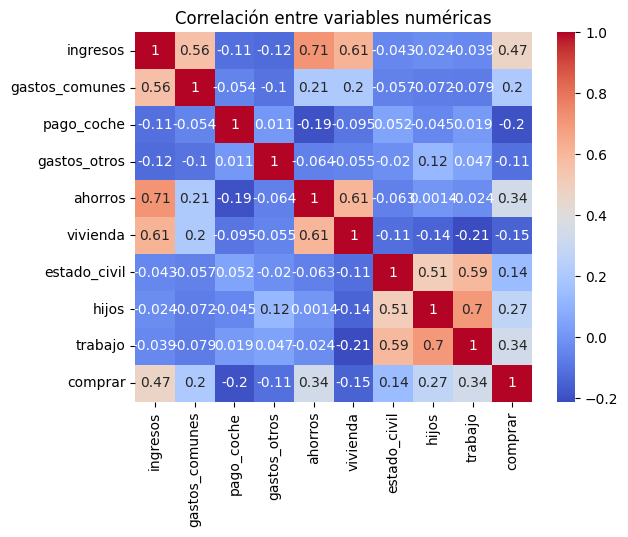

In [3]:
# 3. Exploración inicial
print(df.describe())
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas")
plt.show()

In [4]:
# 4. Selección de variables numéricas
X = df.select_dtypes(include=np.number)
print("Variables numéricas:", X.columns.tolist())

Variables numéricas: ['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar']


In [5]:
# PCA SIN ESCALADO
pca_raw = PCA()
Z_raw = pca_raw.fit_transform(X)
var_raw = pca_raw.explained_variance_ratio_
cum_raw = np.cumsum(var_raw)

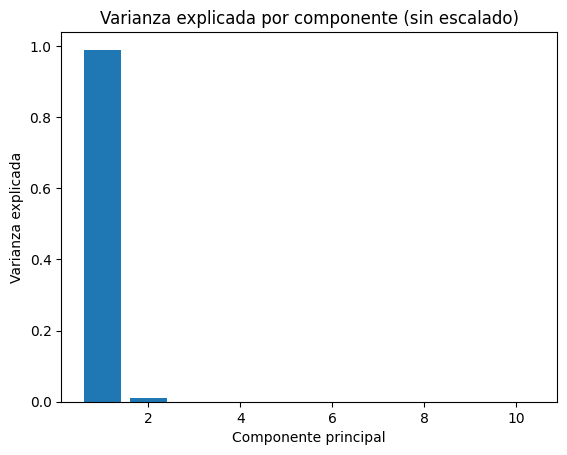

In [6]:
# Gráfica de varianza explicada
plt.bar(range(1,len(var_raw)+1), var_raw)
plt.title("Varianza explicada por componente (sin escalado)")
plt.xlabel("Componente principal"); plt.ylabel("Varianza explicada")
plt.show()

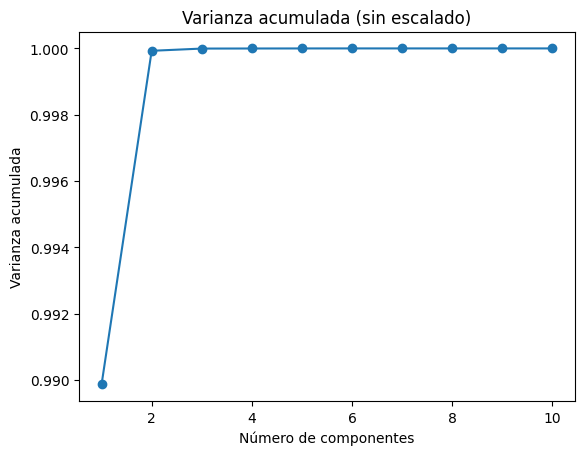

In [7]:
# Gráfica acumulada
plt.plot(range(1,len(cum_raw)+1), cum_raw, "-o")
plt.title("Varianza acumulada (sin escalado)")
plt.xlabel("Número de componentes"); plt.ylabel("Varianza acumulada")
plt.show()

In [8]:
# PCA CON ESCALADO
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

pca_std = PCA()
Z_std = pca_std.fit_transform(Xs)
var_std = pca_std.explained_variance_ratio_
cum_std = np.cumsum(var_std)

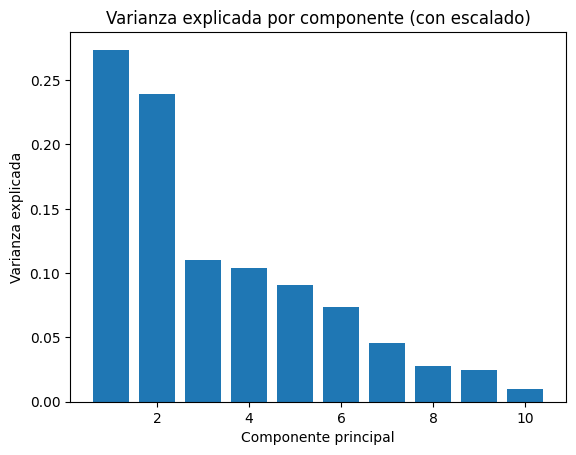

In [10]:
# Gráfica de varianza explicada
plt.bar(range(1,len(var_std)+1), var_std)
plt.title("Varianza explicada por componente (con escalado)")
plt.xlabel("Componente principal"); plt.ylabel("Varianza explicada")
plt.show()

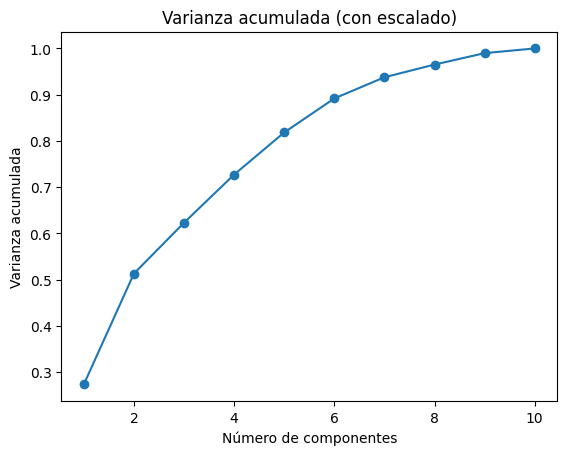

In [11]:
# Gráfica acumulada
plt.plot(range(1,len(cum_std)+1), cum_std, "-o")
plt.title("Varianza acumulada (con escalado)")
plt.xlabel("Número de componentes"); plt.ylabel("Varianza acumulada")
plt.show()

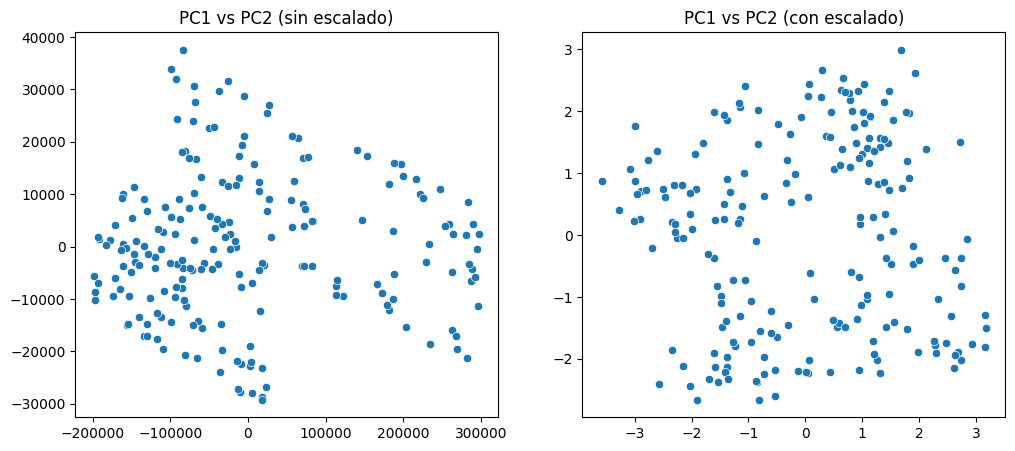

In [12]:
# COMPARACIÓN VISUAL PC1 vs PC2
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=Z_raw[:,0], y=Z_raw[:,1])
plt.title("PC1 vs PC2 (sin escalado)")

plt.subplot(1,2,2)
sns.scatterplot(x=Z_std[:,0], y=Z_std[:,1])
plt.title("PC1 vs PC2 (con escalado)")
plt.show()

In [13]:
# SELECCIÓN DE NÚMERO DE COMPONENTES
n_comp_90 = np.argmax(cum_std >= 0.90) + 1
n_comp_95 = np.argmax(cum_std >= 0.95) + 1

print("Componentes necesarios para 90% varianza:", n_comp_90)
print("Componentes necesarios para 95% varianza:", n_comp_95)

Componentes necesarios para 90% varianza: 7
Componentes necesarios para 95% varianza: 8
